In [1]:
# // p2112646
# Justin Wong Juin Hng
# DAAA/1B/04

import pandas as pd
import numpy as np
import sklearn as sk
from matplotlib import rcParams, pyplot as plt
from sklearn.impute import SimpleImputer
import plotly.express as px
from IPython.core.display import display
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
import gower as gower
from sklearn.preprocessing import scale
import seaborn as sns; sns.set_theme()

pd.set_option('display.max_rows', 200)

## Data Preprocessing

### Importing Data
We first import the dataset into the notebook and check for any null values or unusual anomalies.

In [2]:
df = pd.read_csv('Company_Employee.csv')
df_unscaled = df.copy()
display(df.head())

Age  Gender     BusinessTravel            Job Function  \
0   41  Female      Travel_Rarely                   Sales   
1   49    Male  Travel_Frequently  Research & Development   
2   37    Male      Travel_Rarely  Research & Development   
3   33  Female  Travel_Frequently  Research & Development   
4   27    Male      Travel_Rarely  Research & Development   

   Distance Between Company and Home (KM)  \
0                                       1   
1                                       8   
2                                       2   
3                                       3   
4                                       2   

   Education (1 is lowest, 5 is highest)  \
0                                      2   
1                                      1   
2                                      2   
3                                      4   
4                                      1   

   Job Satisfaction (1 is lowest, 4 is highest) MaritalStatus  Salary ($)  \
0                                             4        Single        5993   
1                                             2       Married        5130   
2                                             3        Single        2090   
3                                             3       Married        2909   
4                                             2       Married        3468   

   Performance Rating (1 is lowest, 4 is highest)  \
0                                               3   
1                                               4   
2                                               3   
3                                               3   
4                                               3   

   Work Life Balance (1 is worst, 4 is best)  Length of Service (Years)  \
0                                          1                          6   
1                                          3                         10   
2                                          3                          0   
3                                          3                          8   
4                                          3                          2   

  Resign Status  
0           Yes  
1            No  
2           Yes  
3            No  
4            No

As we can see over here, we have 1470 rows each of non-null data for every column. This means that there is no data imputation required.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 13 columns):
 #   Column                                          Non-Null Count  Dtype 
---  ------                                          --------------  ----- 
 0   Age                                             1470 non-null   int64 
 1   Gender                                          1470 non-null   object
 2   BusinessTravel                                  1470 non-null   object
 3   Job Function                                    1470 non-null   object
 4   Distance Between Company and Home (KM)          1470 non-null   int64 
 5   Education (1 is lowest, 5 is highest)           1470 non-null   int64 
 6   Job Satisfaction (1 is lowest, 4 is highest)    1470 non-null   int64 
 7   MaritalStatus                                   1470 non-null   object
 8   Salary ($)                                      1470 non-null   int64 
 9   Performance Rating (1 is lowest, 4 is highest)  1470

We check for unique values to ensure that each column has at least 2 unique values. In this case, the dataset meets the requirements.

Hence, we do not need to drop any columns.

In [4]:
df.nunique()

Age                                                 43
Gender                                               2
BusinessTravel                                       3
Job Function                                         3
Distance Between Company and Home (KM)              29
Education (1 is lowest, 5 is highest)                5
Job Satisfaction (1 is lowest, 4 is highest)         4
MaritalStatus                                        3
Salary ($)                                        1349
Performance Rating (1 is lowest, 4 is highest)       2
Work Life Balance (1 is worst, 4 is best)            4
Length of Service (Years)                           37
Resign Status                                        2
dtype: int64

### Scaling Quantitative Data

**Why Scale Data?**
Various machine learning algorithms are sensitive when the data is not scaled.
There are various machine learning algorithms that use the same kind of basic strategies as their base concept under the algorithm.
These base concepts are totally based on the mapping of the distance between data points; scaling of the data makes it easy for a model to learn and understand the problem. (Verma, 2021)

In [5]:
quantitative = df[['Age','Distance Between Company and Home (KM)','Salary ($)','Length of Service (Years)']]
plot_quantitative = quantitative.copy()
qualitative = df[df.columns.difference(['Age','Distance Between Company and Home (KM)','Salary ($)','Length of Service (Years)'])]
quantitative = pd.DataFrame(scale(quantitative), columns=quantitative.columns)
df = pd.concat([qualitative, quantitative], axis=1)
df

BusinessTravel  Education (1 is lowest, 5 is highest)  Gender  \
0         Travel_Rarely                                      2  Female   
1     Travel_Frequently                                      1    Male   
2         Travel_Rarely                                      2    Male   
3     Travel_Frequently                                      4  Female   
4         Travel_Rarely                                      1    Male   
...                 ...                                    ...     ...   
1465  Travel_Frequently                                      2    Male   
1466      Travel_Rarely                                      1    Male   
1467      Travel_Rarely                                      3    Male   
1468  Travel_Frequently                                      3    Male   
1469      Travel_Rarely                                      3    Male   

                Job Function  Job Satisfaction (1 is lowest, 4 is highest)  \
0                      Sales                                             4   
1     Research & Development                                             2   
2     Research & Development                                             3   
3     Research & Development                                             3   
4     Research & Development                                             2   
...                      ...                                           ...   
1465  Research & Development                                             4   
1466  Research & Development                                             1   
1467  Research & Development                                             2   
1468                   Sales                                             2   
1469  Research & Development                                             3   

     MaritalStatus  Performance Rating (1 is lowest, 4 is highest)  \
0           Single                                               3   
1          Married                                               4   
2           Single                                               3   
3          Married                                               3   
4          Married                                               3   
...            ...                                             ...   
1465       Married                                               3   
1466       Married                                               3   
1467       Married                                               4   
1468       Married                                               3   
1469       Married                                               3   

     Resign Status  Work Life Balance (1 is worst, 4 is best)       Age  \
0              Yes                                          1  0.446350   
1               No                                          3  1.322365   
2              Yes                                          3  0.008343   
3               No                                          3 -0.429664   
4               No                                          3 -1.086676   
...            ...                                        ...       ...   
1465            No                                          3 -0.101159   
1466            No                                          3  0.227347   
1467            No                                          3 -1.086676   
1468            No                                          2  1.322365   
1469            No                                          4 -0.320163   

      Distance Between Company and Home (KM)  Salary ($)  \
0                                  -1.010909   -0.108350   
1                                  -0.147150   -0.291719   
2                                  -0.887515   -0.937654   
3                                  -0.764121   -0.763634   
4                                  -0.887515   -0.644858   
...                                      ...         ...   
1465                 

## Exploratory Data Analysis

### Correlation Matrix of Quantitative Data

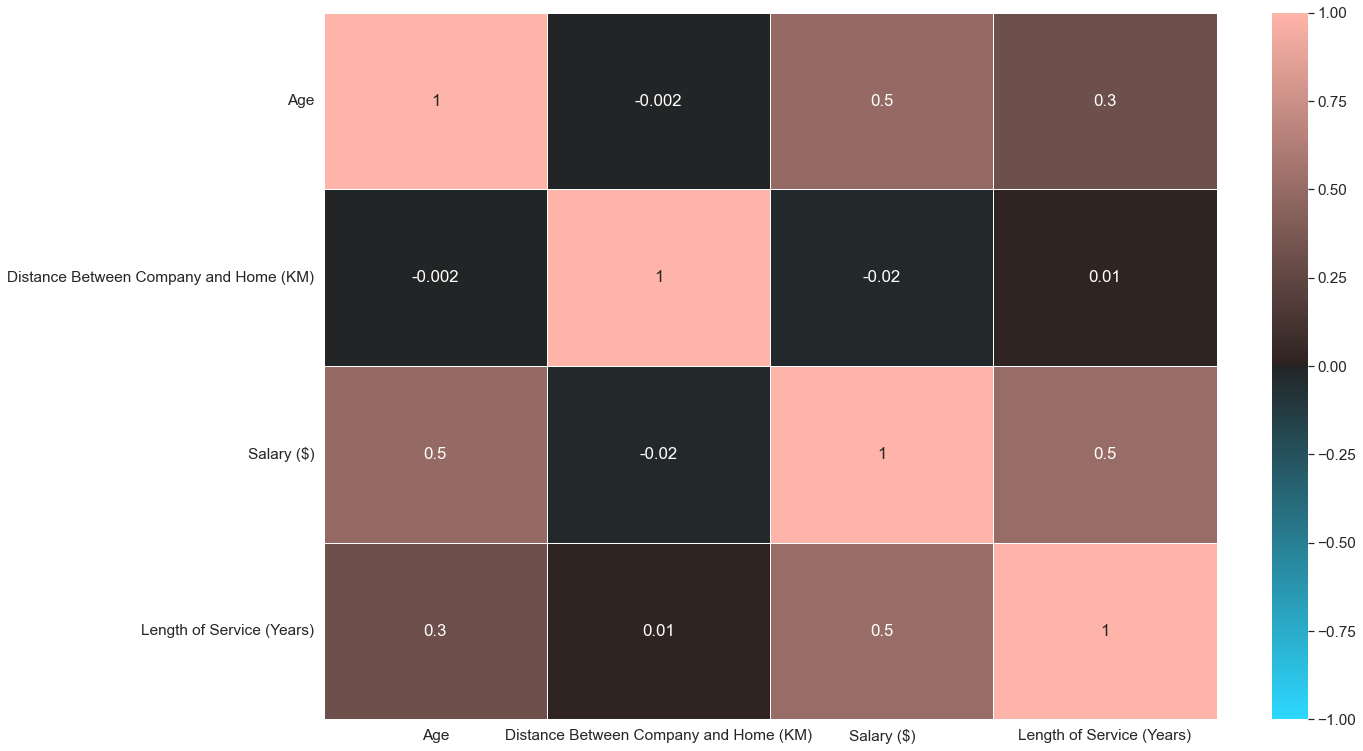

In [6]:
rcParams['figure.figsize'] = 20,13
sns.set(font_scale=1.4)
cmap = sns.diverging_palette(220, 20, s=100,l=80, as_cmap=True,center='dark')
fig = sns.heatmap(quantitative.corr(), annot=True, fmt=".1g",linewidths=.5,vmin=-1, vmax=1,cmap=
                  cmap)


We can see that there is a 50% correlation between `Salary` and `Age`

There is also a 50% correlation between `Length of Service` and `Salary`

However, since it is only 0.5, this means that there is a coin flip chance that these variables are correlated to each other.

Hence, there is no correlation between any of the columns.


### Pair-plot for Pairwise Relationships

In [7]:
plot_quantitative

Age  Distance Between Company and Home (KM)  Salary ($)  \
0      41                                       1        5993   
1      49                                       8        5130   
2      37                                       2        2090   
3      33                                       3        2909   
4      27                                       2        3468   
...   ...                                     ...         ...   
1465   36                                      23        2571   
1466   39                                       6        9991   
1467   27                                       4        6142   
1468   49                                       2        5390   
1469   34                                       8        4404   

      Length of Service (Years)  
0                             6  
1                            10  
2                             0  
3                             8  
4                             2  
...                         ...  
1465                          5  
1466                          7  
1467                          6  
1468                          9  
1469                          4  

[1470 rows x 4 columns]

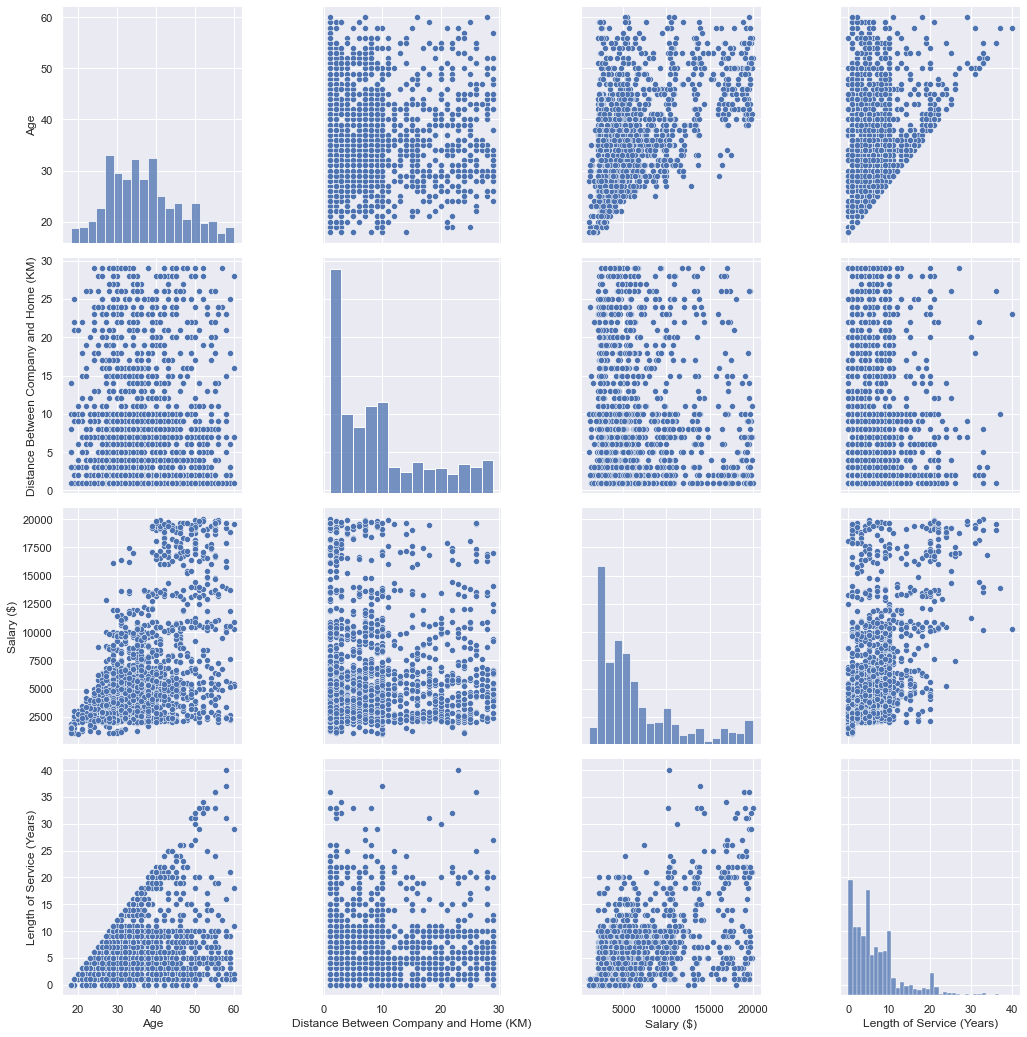

In [8]:
sns.set(font_scale=1)
g = sns.pairplot(plot_quantitative)
g.fig.set_size_inches(15,15)



**Age**

We can observe that the age of the employee corresponds to how long they stay and serve the company. However, we can see that a decent amount of employees leave the company after 10-12 years of service regardless of their age. This trend fades away slightly as employees get older, but the trend is still there.

This means that there is a struggle between job security and the weight of the factors determining them wanting to leave their job. Generally speaking, as employees grow older, the majority of employees want to start a family and settle down. Hence, the need for job security is usually higher then. The need for job security decreases nearing the end of the employee's life, as they have already made enough money to retire. The inverse is true: younger employees do not need job security as they have just entered the workforce and are flexible in wanting to move around and experience differing job roles and/or industries.
<br>

**Distance Between Company and Home**

We can observe that all ages prefer to stay between 0-10km of the company office, demonstrating that there is no apparently and/or explainable relationship between distance between company office and home and the age of the employee.

Additionally, There is also no relationship between distance between company and home and length of service. However, we can observe from the scatter plot that there is a slight preference that employees whose duration of service at the company is longer do stay between 0-10 km away from the company office, a trend that is also seen in the relationship with Age of Employee.

The majority of employees in the company prefer to stay less than 12km away from the office, with the graph skewing towards the right, suggesting that employees who stay further away are of lesser numbers. This may be due to the fact that it is simply not efficient to stay further away from the company. A greater distance from office accounts for greater time taken to travel, more fuel and/or energy wasted and more factors such as:

- Housing is closer to living amenities and social locations while office complexes are not located in convenient locations
- Office buildings are usually located in the Central Business District (CBD), which means that the greater the convenience, the greater the price paid for housing. As a result, the price per sqft. for housing is proportionately higher the lesser the distance from CBD
- Kids schooling also determines priority for housing location; distance from schools and schooling amenities


<br>

**Salary**
We can observe a slight patttern between years of service at the company and the salary of the employee, suggesting that employees who work longer at the company get salary raises each year. However, years of service may not be the only factor that is accounting for a raise in salary.

Unaccounted factors such as educational qualifications, years of industry experience, job role and the hierarchical seniority of the job role itself play major roles in affecting the salary. A fresh PhD graduate can provide as much value to the company as can an industry-certified professional with only a graduate diploma but 10 years more work experience.

Hence, length of service is not the only determining factor behind salary.

The majority of employees in the company are not paid more than $7000 a month, with the graph of salary count skewing towards the right, suggesting that corporate employees that are paid more are of lesser numbers. These may be employees who are in senior job roles within the company, and naturally the ratio between a single manager and a number of employees account for this skew in the data.

### Chi-Square Test for Association
A chi-square test is a statistical test used to compare observed results with expected results.

The purpose of this test is to determine if a difference between observed data and expected data is due to chance, or if it is due to a relationship between the variables you are studying.(www.southampton.ac.uk, n.d.)

Hence, we will be performing 2 Chi-Square Tests:
<br/>

#### Is the distribution of Job Functions the same across different genders?

$H0$: Job Function is _**distributed the same**_ across Gender
$H1$: Job Function is _**not distributed the same**_ across Gender

In [9]:
# chi square test


from scipy.stats import chi2_contingency
from scipy.stats import chi2
from scipy.stats import chisquare
contingency = (pd.crosstab(df['Gender'],
                            df['Job Function'],
                               margins = False))

stat, p, dof, expected = chi2_contingency(contingency)

print('Expected Results')

expected_results = (np.rint(expected).astype('int'))
expected_results = pd.DataFrame(expected_results,columns=contingency.columns)
expected_results = (expected_results.div(expected_results.sum(axis=1), axis=0).round(4)*100).round(4).astype(str) + '%'
display(expected_results)
print('Actual Results')
contingency = ((pd.crosstab(df['Gender'],
                            df['Job Function'],
                               margins = False, normalize='index')).round(4)*100).round(4).astype(str) + '%'
display(contingency)

# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('Probability = %.3f\nCritical Value = %.3f\nTest Statistic = %.3f' % (prob, critical, stat))
if abs(stat) >= critical:
	print('Test Statistic: Dependent (reject H0) | Job Function is not distributed the same across Gender\n')
else:
	print('Test Statistic: Independent (fail to reject H0) | Job Function is distributed the same across Gender\n')

# interpret p-value
alpha = 1.0 - prob
print('\nP-Value significance=%.3f\np=%.3f' % (alpha, p))
if p <= alpha:
	print('P-Value: Dependent (reject H0) | Job Function is not distributed the same across Gender')
else:
	print('P-Value: Independent (fail to reject H0) | Job Function is distributed the same across Gender')

Expected Results


Job Function Human Resources Research & Development   Sales
0                      4.26%                 65.42%  30.32%
1                       4.3%                 65.35%  30.35%

Actual Results


Job Function Human Resources Research & Development   Sales
Gender                                                     
Female                  3.4%                 64.46%  32.14%
Male                   4.88%                 65.99%  29.14%

Probability = 0.950
Critical Value = 5.991
Test Statistic = 2.964
Test Statistic: Independent (fail to reject H0) | Job Function is distributed the same across Gender


P-Value significance=0.050
p=0.227
P-Value: Independent (fail to reject H0) | Job Function is distributed the same across Gender


This shows that the company does not discriminate against gender, as the distribution of the job roles are the same regardless of gender.

Employees who feel welcome in their workplace take 75% fewer sick days and exhibit 50% lower turnover risk, whereas those who experience microaggressions are 3x more likely to think about leaving their jobs (Headstart, 2020).

As such, there is a relationship between the presence of gender bias in the distribution of job roles and turnover rates.


#### Is the distribution of Freq. of Business Travel the same across different Marital Statuses?

$H0$: Freq. of Business Travel is _**distributed the same**_ across Marital Status
$H1$: Freq. of Business Travel is _**not distributed the same**_ across Marital Status

In [10]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2
from scipy.stats import chisquare
contingency = (pd.crosstab(df['MaritalStatus'],
                            df['BusinessTravel'],
                               margins = False))

stat, p, dof, expected = chi2_contingency(contingency)

print('Expected Results')

expected_results = (np.rint(expected).astype('int'))
expected_results = pd.DataFrame(expected_results,columns=contingency.columns)
expected_results = (expected_results.div(expected_results.sum(axis=1), axis=0).round(4)*100).round(4).astype(str) + '%'
display(expected_results)
print('Actual Results')
contingency = ((pd.crosstab(df['MaritalStatus'],
                            df['BusinessTravel'],
                               margins = False, normalize='index')).round(4)*100).round(4).astype(str) + '%'
display(contingency)

# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('Probability = %.3f\nCritical Value = %.3f\nTest Statistic = %.3f' % (prob, critical, stat))
if abs(stat) >= critical:
	print('Test Statistic: Dependent (reject H0) | Freq. of Business Travel is not distributed the same across Marital Status\n')
else:
	print('Test Statistic: Independent (fail to reject H0) | Freq. of Business Travel is distributed the same across Marital Status\n')

# interpret p-value
alpha = 1.0 - prob
print('\nP-Value significance=%.3f\np=%.3f' % (alpha, p))
if p <= alpha:
	print('P-Value: Dependent (reject H0) | Freq. of Business Travel is not distributed the same across Marital Status')
else:
	print('P-Value: Independent (fail to reject H0) | Freq. of Business Travel is distributed the same across Marital Status')

Expected Results


BusinessTravel Non-Travel Travel_Frequently Travel_Rarely
0                  10.09%            18.96%        70.95%
1                  10.24%            18.84%        70.92%
2                  10.21%            18.94%        70.85%

Actual Results


BusinessTravel Non-Travel Travel_Frequently Travel_Rarely
MaritalStatus                                            
Divorced           13.46%            19.27%        67.28%
Married             8.77%            17.53%         73.7%
Single              10.0%            20.43%        69.57%

Probability = 0.950
Critical Value = 9.488
Test Statistic = 7.502
Test Statistic: Independent (fail to reject H0) | Freq. of Business Travel is distributed the same across Marital Status


P-Value significance=0.050
p=0.112
P-Value: Independent (fail to reject H0) | Freq. of Business Travel is distributed the same across Marital Status


This shows that the marital status of employees is not associated with the frequency of business travel.

Interestingly enough, I would have assumed that employees who are not married would travel more frequently due to there being restrictions on time commitment.

I initially hypothesised that married employees who travel frequently would be an anomaly, but it turns out that the distribution is generally the same. 

This may be due to overseas training and team building activities that require international travel.


## Modelling

### Feature Engineering

#### Metrics Available

1. Euclidean Distance

\begin{document}
\[
d\left( p,q\right) = \sqrt {\sum _{i=1}^{n}  \left( q_{i}-p_{i}\right)^2 }
\]
\end{document}

2. Manhattan Distance
\begin{document}
\[
d(M,P) ≡ |Mx-Px|+|My-Py|
\]
\end{document}

3. Minkowski Distance

\begin{document}
\[
$ \left(\sum_{i=1}^n|x_i-y_i|^p\right)^{1/p} $
\]
\end{document}

4. Hamming Distance

\begin{document}
\[
{HD}_{{raw}}=
\frac{\lVert ({codeA}\otimes{codeB})\cap{maskA}\cap{maskB}\rVert}
     {\lVert{maskA}\cap{maskB}\rVert}
\]
\end{document}

5. Gower Distance

\begin{document}
\[
$ S_{\text{Gower}}(x_i, x_j) = \frac{\sum_{k=1}^p s_{ijk}\delta_{ijk}}{\sum_{k=1}^p \delta_{ijk}} $
\]
\end{document}

#### Choice of Metric

**Gower Distance**

Why choose Gower Distance? Gower Distance is able to compute the distance between quantitative, qualitative and logical data.

Quantitative (interval): range-normalized Manhattan distance
Ordinal: variable is first ranked, then Manhattan distance is used with a special adjustment for ties
Nominal: variables of k categories are first converted into k binary columns and then the Dice coefficient is used
(Anand, 2020)

In [11]:
distance_matrix = gower.gower_matrix(df)
distance_matrix

array([[0.        , 0.6284042 , 0.2681909 , ..., 0.5408966 , 0.42945725,
        0.4718212 ],
       [0.6284042 , 0.        , 0.4225706 , ..., 0.1784583 , 0.2374085 ,
        0.28554156],
       [0.2681909 , 0.4225706 , 0.        , ..., 0.3274025 , 0.4308582 ,
        0.23776163],
       ...,
       [0.5408966 , 0.1784583 , 0.3274025 , ..., 0.        , 0.31101316,
        0.16290095],
       [0.42945725, 0.2374085 , 0.4308582 , ..., 0.31101316, 0.        ,
        0.28833467],
       [0.4718212 , 0.28554156, 0.23776163, ..., 0.16290095, 0.28833467,
        0.        ]], dtype=float32)

### Silhouette Score

Silhouette score is used to evaluate the quality of clusters created using clustering algorithms such as K-Means in terms of how well samples are clustered with other samples that are similar to each other. The Silhouette score is calculated for each sample of different clusters. (Kumar, 2020a)

\begin{document}
\[
s\left( o\right) = \frac{b\left( o\right) - a\left( o\right)}
     {max\nbsp \{ b\left( o\right),a\left( o\right)\} }
\]
\end{document}


### Model Exploration
1. Agglomerative Clustering
2. DBSCAN
3. K-Means
4. OPTICS


#### Agglomerative Clustering
Agglomerative Clustering is a type of hierarchical clustering algorithm. It is an unsupervised machine learning technique that divides the population into several clusters such that data points in the same cluster are more similar and data points in different clusters are dissimilar. (Kumar, 2020)

<u> **How does it work?** </u>
Agglomerative Clustering works by going from the bottom up- all data points are a cluster of their own, and then it takes the 2 nearest clusters and joins them to form a new cluster. This step is repeated recursively until the number of clusters desired is reached.

Pros:
- Do not need to specify number of clusters: can read dendrogram to interpret optimal number of clusters
- Easy to understand and implement

Cons:
- Does not work well on large amounts of data
- Once a decision is made to cluster the 2 clusters, it cannot be undone
- Order, sensitivity and noise of data may affect results

##### Find Optimal n_clusters Value

We use the dendrogram to determine the best `n_clusters` value

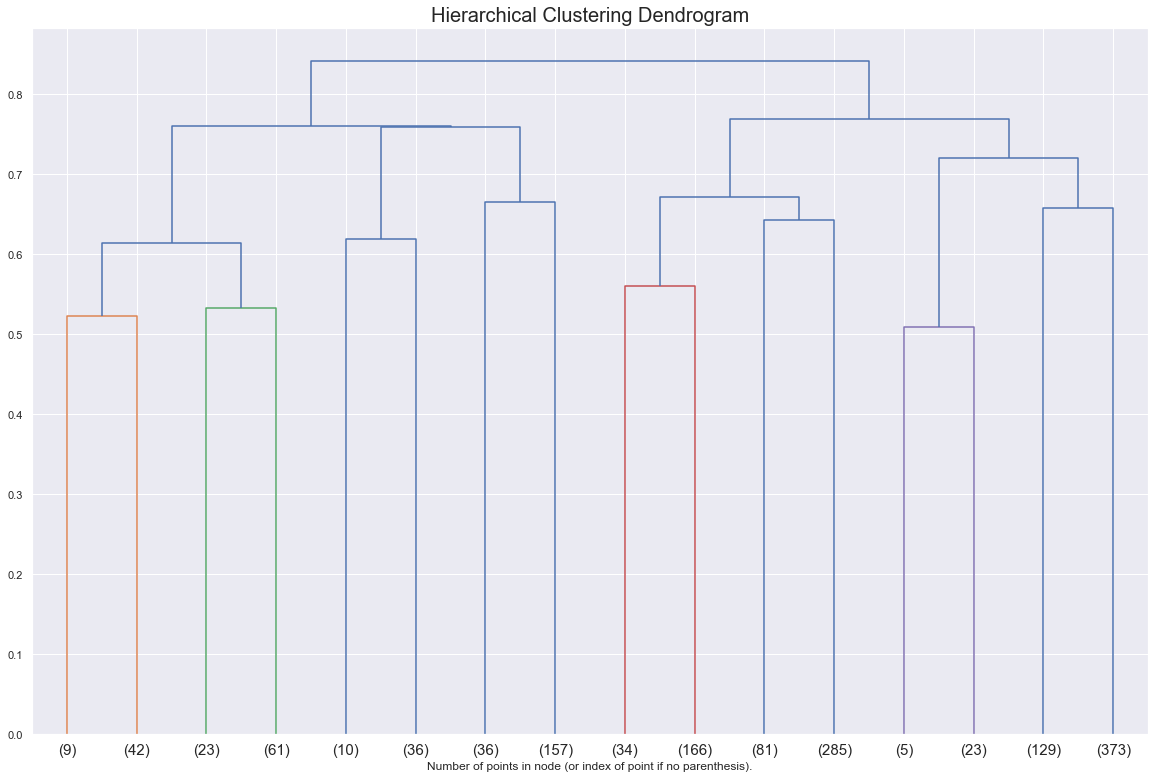

In [12]:
from sklearn.neighbors import NearestCentroid
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

silhouette = {}

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    sch.dendrogram(linkage_matrix,leaf_font_size=15, **kwargs)


# plot dendrogram
model_plot =  AgglomerativeClustering(distance_threshold=0, n_clusters=None,affinity='precomputed', linkage='complete').fit(distance_matrix)
plot_dendrogram(model_plot, truncate_mode="level", p=3)
plt.title("Hierarchical Clustering Dendrogram",fontdict={'fontsize': 20})
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()


We can see that the best value for `n_clusters` = `5`

In [13]:
# initialise model
model = AgglomerativeClustering(n_clusters=5, affinity='precomputed', linkage='average')
pred = pd.DataFrame(model.fit_predict(distance_matrix),columns=['Cluster'])
results = pd.concat([df_unscaled,pred],axis=1)
count = pd.DataFrame(model.fit(distance_matrix).labels_).value_counts()
display(count)
cluster_centers = results.groupby('Cluster').mean()

cluster_centers

0    1243
1     215
3       6
4       5
2       1
dtype: int64

Age  Distance Between Company and Home (KM)  \
Cluster                                                      
0        37.489944                                8.920354   
1        33.037209                               10.711628   
2        54.000000                               26.000000   
3        49.166667                               10.166667   
4        45.200000                                7.000000   

         Education (1 is lowest, 5 is highest)  \
Cluster                                          
0                                     2.930813   
1                                     2.804651   
2                                     3.000000   
3                                     4.000000   
4                                     1.800000   

         Job Satisfaction (1 is lowest, 4 is highest)    Salary ($)  \
Cluster                                                               
0                                            2.779566   6787.009654   
1                                            2.441860   4441.613953   
2                                            4.000000  17328.000000   
3                                            2.166667  13595.666667   
4                                            2.800000  13841.400000   

         Performance Rating (1 is lowest, 4 is highest)  \
Cluster                                                   
0                                              3.145615   
1                                              3.172093   
2                                              3.000000   
3                                              4.000000   
4                                              3.400000   

         Work Life Balance (1 is worst, 4 is best)  Length of Service (Years)  
Cluster                                                                        
0                                         2.785197                   7.286404  
1                                         2.651163                   4.804651  
2                                         3.000000                   5.000000  
3                                         2.333333                  20.166667  
4                                         2.000000                  17.200000

We can see that the distribution for each cluster is terrible, and skews more towards clusters 1 and 2. However, we can see that the dissimilarity in each cluster is of a decent amount.

This may be due to the data having too many outliers, noise and due to the limitations of not being able to go back after clustering the data, this may have further snowballed the problem.

This suggests that the clusters are able to differentiated from each other, and that there is at a identifiable difference in the properties of each cluster.

##### Silhouette Score




In [14]:
# calculate silhouette score
silhouette['Agglomerative'] = silhouette_score(distance_matrix,labels=model.fit_predict(distance_matrix))
silhouette_score(distance_matrix,labels=model.fit_predict(distance_matrix))


0.1100408

#### DBSCAN

We use DBSCAN as it is not vulnerable to outlier values and does not require us to specify the number of clusters

<u> *How does it work?*</u>
We first define 2 parameters:
1. Epsilon
    The epsilon determines the maximum radius of the neighbourhood that will encompass the points of the cluster. This epsilon will look for the minimum number of points within this epsilon to consider itself a cluster
2. Minimum Points
    Minimum points is a value the minimum number of points in the epsilon for the neibourhood to be considered a cluster. High Minimum Points values make more clusters and result in more noise, and low Minimum Points values make more robust clusters but may 'eat up' smaller clusters present in the data.

Pros:
1. Do not need to predefine number of clusters
2. Able to handle outliers
3. Able to handle non-linear shape of clusters etc. Circles, arbitrary shapes

Cons:
1. Unable to identify clusters of different density
2. Does not perform well with high-dimensional data
3. Sensitive to parameter values (epsilon, min points)


##### Find Optimal Epsilon & MinPts

In [15]:
from sklearn.neighbors import NearestNeighbors
import plotly.express as px

# find best epsilon value
neighbors = 26
nbrs = NearestNeighbors(n_neighbors=neighbors).fit(distance_matrix)
distances, indices = nbrs.kneighbors(distance_matrix)
distance_desc = sorted(distances[:,6-1], reverse=True)
px.line(x=list(range(1,len(distance_desc )+1)),y= distance_desc )

Optimal Epsilon Value: 0.033356024506466984


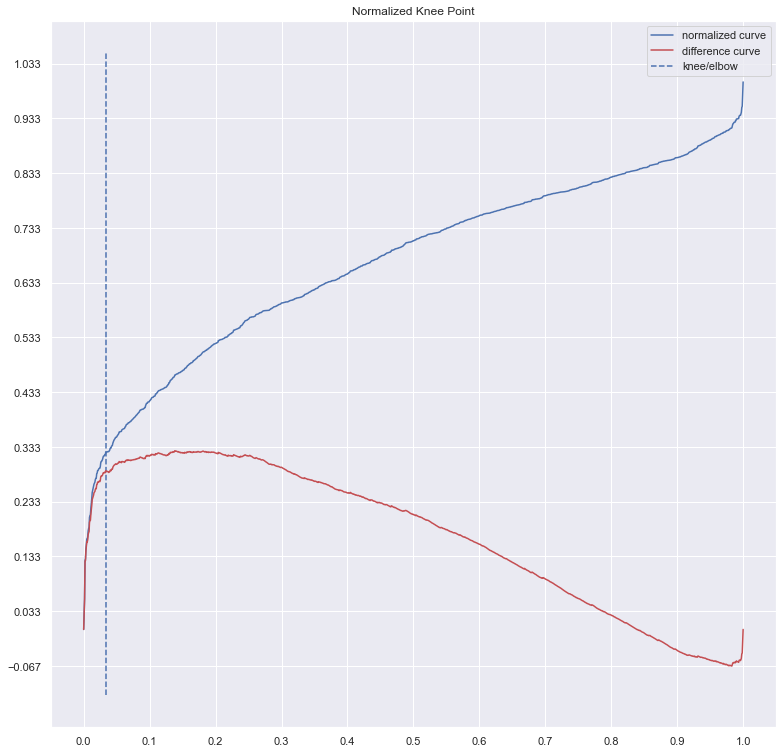

In [16]:
# locate knee of plot to find epsilon value
from kneed import KneeLocator
kneedle = KneeLocator(range(1,len(distance_desc)+1),  #x values
                      distance_desc, # y values
                      S=1.0, #parameter suggested from paper
                      curve="convex", #parameter from figure
                      direction="decreasing") #parameter from figure
kneedle.plot_knee_normalized(figsize=(13,13))
print("Optimal Epsilon Value:", str(kneedle.find_knee()[1]))

##### Initialise DBSCAN Model

In [17]:
from sklearn.cluster import DBSCAN

# initialise and fit model with pre-calculated epsilon value and samples = 2 * dimensions
model = DBSCAN(metric='precomputed',eps=0.033356024506466984,min_samples=26).fit(distance_matrix)
labels = model.labels_
no_clusters = len(np.unique(labels) )
no_noise = np.sum(np.array(labels) == -1, axis=0)

# check for noise
print('Estimated no. of clusters: %d' % no_clusters)
print('Estimated no. of noise points: %d' % no_noise)


model = DBSCAN(metric='precomputed',eps=0.033356024506466984,min_samples=26)
pred = pd.DataFrame(model.fit_predict(distance_matrix),columns=['Cluster'])
results = pd.concat([df_unscaled,pred],axis=1)
cluster_centers = results.groupby('Cluster').mean()

cluster_centers

Estimated no. of clusters: 1
Estimated no. of noise points: 1470


Age  Distance Between Company and Home (KM)  \
Cluster                                                     
-1       36.92381                                9.192517   

         Education (1 is lowest, 5 is highest)  \
Cluster                                          
-1                                    2.912925   

         Job Satisfaction (1 is lowest, 4 is highest)   Salary ($)  \
Cluster                                                              
-1                                           2.728571  6502.931293   

         Performance Rating (1 is lowest, 4 is highest)  \
Cluster                                                   
-1                                             3.153741   

         Work Life Balance (1 is worst, 4 is best)  Length of Service (Years)  
Cluster                                                                        
-1                                        2.761224                   7.008163

The performance of DBSCAN on this dataset is terrible as there are no valid clusters available, as the data:
1. Has too many dimensions
2. Many varying densities

This causes the performance of the DBSCAN to be very bad.

##### Silhouette Score

Unable to calculate silhouette score as the length of unique labels must be bigger than 0.

In [18]:
# calculate silhouette score
# silhouette_score(distance_matrix,labels=pred)
silhouette['DBSCAN'] = np.nan

##### Model Results
We can see that the performance of the DBSCAN algorithm is terrible, even after finding the optimal epsilon and minpts values. Therefore, we will not use the DBSCAN algorithm for hyperparameter tuning

#### K-Medoids

k-medoids minimizes the sum of dissimilarities between points labeled to be in a cluster and a point designated as the center of that cluster. In contrast to the k-means algorithm, k-medoids chooses datapoints as centers.  (Mirkes, 2011)

<u> *How does it work?*</u>
1. Initialise: randomly select k of the n data points as the medoids
2. Assignment step: Associate each data point to the closest medoid.
3. Update step: For each medoid m and each data point o associated to m swap m and o and compute the total cost of the configuration (that is, the average dissimilarity of o to all the data points associated to m). Select the medoid o with the lowest cost of the configuration.
4. Repeat alternating steps 2 and 3 until there is no change in the assignments.

Pros:
1. Able to solve K-means problems and produce empty clusters
2. Fast and converges quickly

Cons:
1. Requires precision
2. Complex

##### Find Optimal k Value

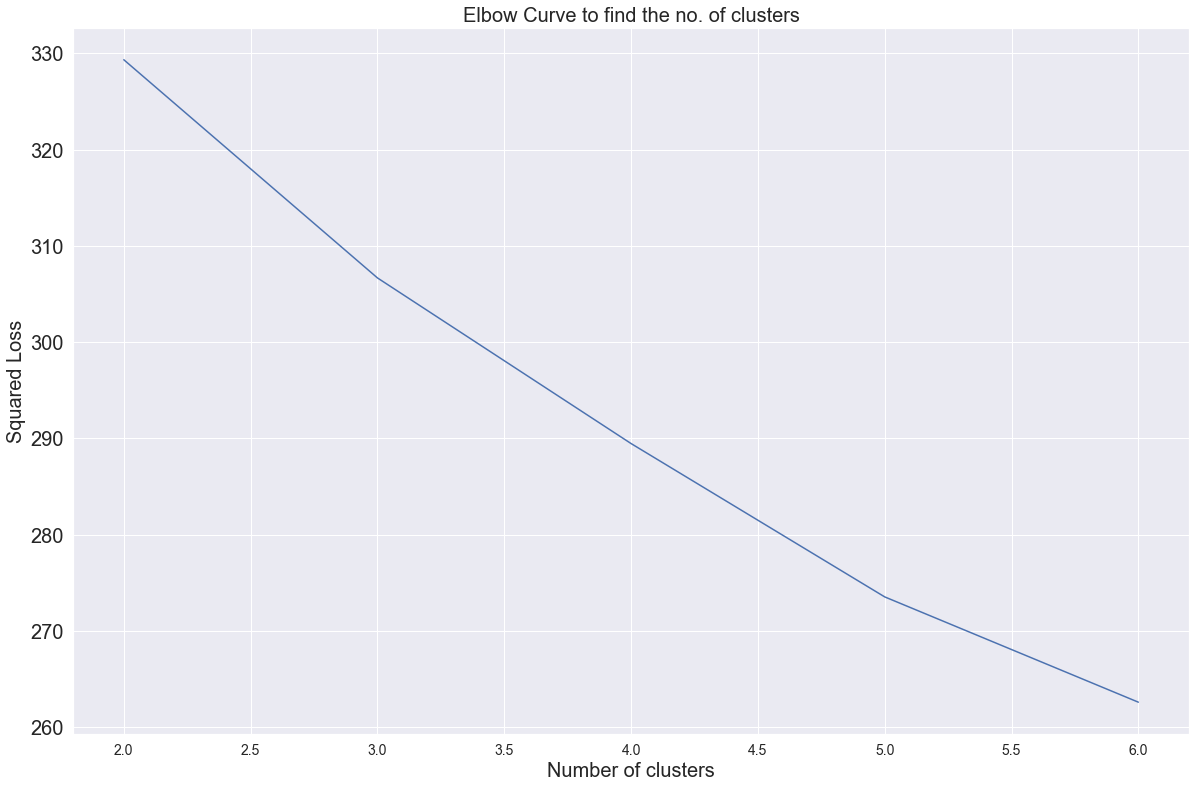

In [19]:
from sklearn_extra.cluster import KMedoids
fig, ax = plt.subplots()

# We change the fontsize of  ticks label
ax.tick_params(axis='both', which='minor', labelsize=20)
ax.tick_params(axis='both', which='major', labelsize=20)

# experiment with different k value
squared_errors = []
num_cluster = [2,3,4,5,6]
for cluster in num_cluster:
    kmediods = KMedoids(n_clusters = cluster, method="pam",metric='precomputed')
    kmediods.fit(distance_matrix) # Train Cluster
    squared_errors.append(kmediods.inertia_)  # Appending the squared loss obtained in the list


# plot elbow plot
optimal_clusters = np.argmin(squared_errors)# As argmin return the index of minimum loss.
plt.plot(num_cluster, squared_errors)
plt.title("Elbow Curve to find the no. of clusters", fontdict={'fontsize':20})
plt.xlabel("Number of clusters",fontdict={'fontsize':20})
plt.ylabel("Squared Loss",fontdict={'fontsize':20})
plt.xticks(fontsize=14)
plt.grid(True)
plt.show()


We can observe a slight bend in the elbow plot at `k`= 3.

Therefore, we will choose `k`= 3 for our KMedoids algorithm

In [20]:
# Fit model with 'pam' to make it more accurate
model = KMedoids(metric='precomputed',method='pam',n_clusters=3,random_state=0).fit(distance_matrix)
labels = model.labels_
no_clusters = len(np.unique(labels) )
no_noise = np.sum(np.array(labels) == -1, axis=0)

# check for noise
print('Estimated no. of clusters: %d' % no_clusters)
print('Estimated no. of noise points: %d' % no_noise)

# fit results into df
pred = pd.DataFrame(model.fit_predict(distance_matrix),columns=['Cluster'])
results = pd.concat([df_unscaled,pred],axis=1)
count = pd.DataFrame(model.fit(distance_matrix).labels_).value_counts()
display(count)
cluster_centers = results.groupby('Cluster').mean()

cluster_centers

Estimated no. of clusters: 3
Estimated no. of noise points: 0


0    687
1    423
2    360
dtype: int64

Age  Distance Between Company and Home (KM)  \
Cluster                                                      
0        36.761281                                9.197962   
1        36.241135                                9.144208   
2        38.036111                                9.238889   

         Education (1 is lowest, 5 is highest)  \
Cluster                                          
0                                     2.813683   
1                                     2.947991   
2                                     3.061111   

         Job Satisfaction (1 is lowest, 4 is highest)   Salary ($)  \
Cluster                                                              
0                                            2.700146  6223.489083   
1                                            2.761229  6625.241135   
2                                            2.744444  6892.486111   

         Performance Rating (1 is lowest, 4 is highest)  \
Cluster                                                   
0                                              3.158661   
1                                              3.151300   
2                                              3.147222   

         Work Life Balance (1 is worst, 4 is best)  Length of Service (Years)  
Cluster                                                                        
0                                         2.746725                   6.593886  
1                                         2.803783                   7.172577  
2                                         2.738889                   7.605556

We can see that the distribution for the clusters is decent. However, the results of the clusters are too similar and are not distinct enough to come to definite conclusions about the difference in the properties of each cluster


##### Silhouette Score

In [21]:
# calculate silhouette score
silhouette['KMedoids'] = silhouette_score(distance_matrix,labels=model.fit_predict(distance_matrix))
silhouette_score(distance_matrix,labels=model.fit_predict(distance_matrix))


0.0816606

#### Spectral Clustering
Spectral clustering is a technique with roots in graph theory, where the approach is used to identify communities of nodes in a graph based on the edges connecting them. The method is flexible and allows us to cluster non graph data as well. (Fleshman, 2019)



<u>*How does it work?*</u>
1. Construct similarity graph
2. Embed data points in low-dimensional space with the help of eigenvectors of Laplacian graph
3. Classical clustering algorithm is applied to partition embedding

Pros:
1. Makes no assumption about the shape of the cluster
2. K-Mean requires an iterative process to find local minima

Cons:
1. Use of K-Means clustering in the final step implies that the clusters are not always the same. They may vary depending on the choice of initial centroids. (Doshi, 2019)
2. Computationally expensive for large datasets — This is because eigenvalues and eigenvectors need to be computed, and then we have to do clustering on these vectors. For large, dense datasets, this may increase time complexity quite a bit. (Doshi, 2019)

##### Convert Distance Matrix to Similarity Matrix

In [22]:
from sklearn.cluster import SpectralClustering

# convert from distance to similarity
beta = 10
similarity = np.exp(-beta * distance_matrix / distance_matrix.std())

##### Initialise Spectral Clustering Model

In [23]:
# fit model
model = SpectralClustering(n_clusters = 5, affinity ='precomputed',random_state=0).fit(similarity)
labels = model.labels_
no_clusters = len(np.unique(labels) )
no_noise = np.sum(np.array(labels) == -1, axis=0)

# check for noise
print('Estimated no. of clusters: %d' % no_clusters)
print('Estimated no. of noise points: %d' % no_noise)

# fit results into df
pred = pd.DataFrame(model.fit_predict(similarity),columns=['Cluster'])
results = pd.concat([df_unscaled,pred],axis=1)
count = pd.DataFrame(model.fit(similarity).labels_).value_counts()
display(count)
cluster_centers = results.groupby('Cluster').mean()

cluster_centers

Estimated no. of clusters: 5
Estimated no. of noise points: 0


0    593
2    493
4    290
3     92
1      2
dtype: int64

Age  Distance Between Company and Home (KM)  \
Cluster                                                      
0        37.335582                                9.101180   
1        35.500000                                6.500000   
2        38.212982                                9.269777   
3        30.413043                                9.391304   
4        35.965517                                9.203448   

         Education (1 is lowest, 5 is highest)  \
Cluster                                          
0                                     2.890388   
1                                     3.500000   
2                                     2.965517   
3                                     2.684783   
4                                     2.937931   

         Job Satisfaction (1 is lowest, 4 is highest)   Salary ($)  \
Cluster                                                              
0                                            2.794266  6396.234401   
1                                            1.000000  6494.500000   
2                                            2.667343  6998.713996   
3                                            2.413043  3601.369565   
4                                            2.810345  6798.831034   

         Performance Rating (1 is lowest, 4 is highest)  \
Cluster                                                   
0                                              3.161889   
1                                              4.000000   
2                                              3.164300   
3                                              3.228261   
4                                              3.089655   

         Work Life Balance (1 is worst, 4 is best)  Length of Service (Years)  
Cluster                                                                        
0                                         2.768971                   6.954469  
1                                         3.000000                   6.500000  
2                                         2.736308                   7.626775  
3                                         2.663043                   3.989130  
4                                         2.817241                   7.027586

After initialising a random Beta value and n_clusters value, we can see that the performance of the Spectral Clustering is the best so far. It is able to tread the lines between identifiable differences in clusters while maintaining a fairly reasonable cluster size.

Understandably, the cluster variance in cluster size is pretty high. However, this is a rather good result from the initial modelling already, all clusters are at least double digits in size.


##### Silhouette Score

In [24]:
# add silhouette score
silhouette['Spectral'] = silhouette_score(distance_matrix,labels=model.fit_predict(similarity))
silhouette_score(distance_matrix,labels=model.fit_predict(similarity))


0.117035806

### Model Analysis

In [25]:
# sort dict by value
dict(sorted(silhouette.items(), key=lambda item: item[1], reverse=True))

{'DBSCAN': nan,
 'Spectral': 0.117035806,
 'Agglomerative': 0.1100408,
 'KMedoids': 0.0816606}

We can see that the silhouette score for Spectral Clustering is the highest, at 0.117

Therefore, we will proceed with Spectral Clustering & Agglomerative Clustering for hyperparameter tuning

##### Radar Chart for Cluster Analysis

In [26]:
import textwrap
from matplotlib.pyplot import figure

class ComplexRadar():
    """
    Create a complex radar chart with different scales for each variable
    Parameters
    ----------
    fig : figure object
        A matplotlib figure object to add the axes on
    variables : list
        A list of variables
    ranges : list
        A list of tuples (min, max) for each variable
    n_ring_levels: int, defaults to 5
        Number of ordinate or ring levels to draw
    show_scales: bool, defaults to True
        Indicates if we the ranges for each variable are plotted
    credits: https://towardsdatascience.com/how-to-create-and-visualize-complex-radar-charts-f7764d0f3652
    """
    def __init__(self, fig, variables, ranges, n_ring_levels=5, show_scales=True):
        # Calculate angles and create for each variable an axes
        # Consider here the trick with having the first axes element twice (len+1)
        angles = np.arange(0, 360, 360./len(variables))
        axes = [fig.add_axes([0.1,0.1,0.9,0.9], polar=True, label = "axes{}".format(i)) for i in range(len(variables)+1)]

        # Ensure clockwise rotation (first variable at the top N)
        for ax in axes:
            ax.set_theta_zero_location('N')
            ax.set_theta_direction(-1)
            ax.set_axisbelow(True)

        # Writing the ranges on each axes
        for i, ax in enumerate(axes):

            # Here we do the trick by repeating the first iteration
            j = 0 if (i==0 or i==1) else i-1
            ax.set_ylim(*ranges[j])
            # Set endpoint to True if you like to have values right before the last circle
            grid = np.linspace(*ranges[j], num=n_ring_levels,
                               endpoint=False)
            gridlabel = ["{}".format(round(x,2)) for x in grid]
            gridlabel[0] = "" # remove values from the center
            lines, labels = ax.set_rgrids(grid, labels=gridlabel, angle=angles[j])

            ax.set_ylim(*ranges[j])
            ax.spines["polar"].set_visible(False)
            ax.grid(visible=False)

            if show_scales == False:
                ax.set_yticklabels([])

        # Set all axes except the first one unvisible
        for ax in axes[1:]:
            ax.patch.set_visible(False)
            ax.xaxis.set_visible(False)

        # Setting the attributes
        self.angle = np.deg2rad(np.r_[angles, angles[0]])
        self.ranges = ranges
        self.ax = axes[0]
        self.ax1 = axes[1]
        self.plot_counter = 0

        # Draw (inner) circles and lines
        self.ax.yaxis.grid()
        self.ax.xaxis.grid()

        # Draw outer circle
        self.ax.spines['polar'].set_visible(True)

        # ax1 is the duplicate of axes[0] (self.ax)
        # Remove everything from ax1 except the plot itself
        self.ax1.axis('off')
        self.ax1.set_zorder(9)

        # Create the outer labels for each variable
        l, text = self.ax.set_thetagrids(angles, labels=variables)

        # Beautify them
        labels = [t.get_text() for t in self.ax.get_xticklabels()]
        labels = ['\n'.join(textwrap.wrap(l, 15,
                                          break_long_words=False)) for l in labels]
        self.ax.set_xticklabels(labels,fontdict={'fontsize': 13})

        for t,a in zip(self.ax.get_xticklabels(),angles):
            if a == 0:
                t.set_ha('center')
            elif a > 0 and a < 180:
                t.set_ha('left')
            elif a == 180:
                t.set_ha('center')
            else:
                t.set_ha('right')

        self.ax.tick_params(axis='both', pad=15)


    def _scale_data(self, data, ranges):
        """Scales data[1:] to ranges[0]"""
        for d, (y1, y2) in zip(data[1:], ranges[1:]):
            assert (y1 <= d <= y2) or (y2 <= d <= y1)
        x1, x2 = ranges[0]
        d = data[0]
        sdata = [d]
        for d, (y1, y2) in zip(data[1:], ranges[1:]):
            sdata.append((d-y1) / (y2-y1) * (x2 - x1) + x1)
        return sdata

    def plot(self, data, *args, **kwargs):
        """Plots a line"""
        sdata = self._scale_data(data, self.ranges)
        self.ax1.plot(self.angle, np.r_[sdata, sdata[0]], *args, **kwargs)
        self.plot_counter = self.plot_counter+1

    def fill(self, data, *args, **kwargs):
        """Plots an area"""
        sdata = self._scale_data(data, self.ranges)
        self.ax1.fill(self.angle, np.r_[sdata, sdata[0]], *args, **kwargs)

    def use_legend(self, *args, **kwargs):
        """Shows a legend"""
        self.ax1.legend(*args, **kwargs)

    def set_title(self, title, pad=25, **kwargs):
        """Set a title"""
        self.ax.set_title(title,pad=pad,fontdict={'fontsize': 20}, **kwargs)


### Hyperparameter Tuning (Spectral)

Model Chosen: Spectral Clustering

From the previous results of the clusters, we can observe that the optimum number of clusters was roughly between 3-5.

Hence, we will take into account these factors when considering the best result to use and analyse:
1. Clusters must be between 3-5
2. Cluster size must not go below double digits
3. Variability in clusters must be enough to tell them apart, and they must have distinctive differences

When analysing the results, it is important to note that the silhouette score isn't a one-size-fits-all solution to be choosing the best cluster. It just provides a good estimate as to the performance of each model. However, it ultimately comes down to the interpretation of each cluster that makes the most impact.

In [27]:
# from sklearn.model_selection import ParameterGrid
#
# #defining hyper parameters
# param_grid = {
#     'beta': np.arange(4,11,1),
#     'n_clusters': [2,3,4,5],
#     'assign_labels' : ['kmeans', 'discretize'],
#     'eigen_solver' : ['arpack', 'amg'],
# }
# params = list(ParameterGrid(param_grid))
# results = {}
#
# for param in params:
#     # initialising beta value and converting distance matrix to similarity matrix
#     beta = param['beta']
#     similarity = np.exp(-beta * distance_matrix / distance_matrix.std())
#
#     # initialising model
#     model = SpectralClustering(
#         n_clusters = param['n_clusters'],
#         assign_labels=param['assign_labels'],
#         eigen_solver = param['eigen_solver'],
#         affinity ='precomputed',
#         random_state=0,
#         n_jobs=-1
#     ).fit(similarity)
#
#     # retrieving model results
#     labels = model.labels_
#     no_clusters = len(np.unique(labels) )
#     no_noise = np.sum(np.array(labels) == -1, axis=0)
#     pred = model.fit_predict(similarity)
#     sil = silhouette_score(distance_matrix,labels=model.fit_predict(similarity))
#     if param['n_clusters']>2:
#         results[sil] = {
#             'beta':param['beta'],
#             'n_clusters':param['n_clusters'],
#             'assign_labels':param['assign_labels'],
#             'eigen_solver':param['eigen_solver'],
#             'noise': no_noise
#         }
#
# results = dict(sorted(results.items(), key=lambda item: item[0], reverse=True))
# results

Estimated no. of clusters: 3
Estimated no. of noise points: 0


1    800
0    532
2    138
dtype: int64

Age  Distance Between Company and Home (KM)  \
Cluster                                                      
0        38.125940                                 9.18609   
1        37.002500                                 9.05750   
2        31.833333                                10.00000   

         Education (1 is lowest, 5 is highest)  \
Cluster                                          
0                                     2.954887   
1                                     2.906250   
2                                     2.789855   

         Job Satisfaction (1 is lowest, 4 is highest)   Salary ($)  \
Cluster                                                              
0                                            2.721805  6968.744361   
1                                            2.790000  6568.713750   
2                                            2.398551  4325.840580   

         Performance Rating (1 is lowest, 4 is highest)  \
Cluster                                                   
0                                              3.157895   
1                                              3.146250   
2                                              3.181159   

         Work Life Balance (1 is worst, 4 is best)  Length of Service (Years)  
Cluster                                                                        
0                                         2.755639                   7.567669  
1                                         2.777500                   7.077500  
2                                         2.688406                   4.449275

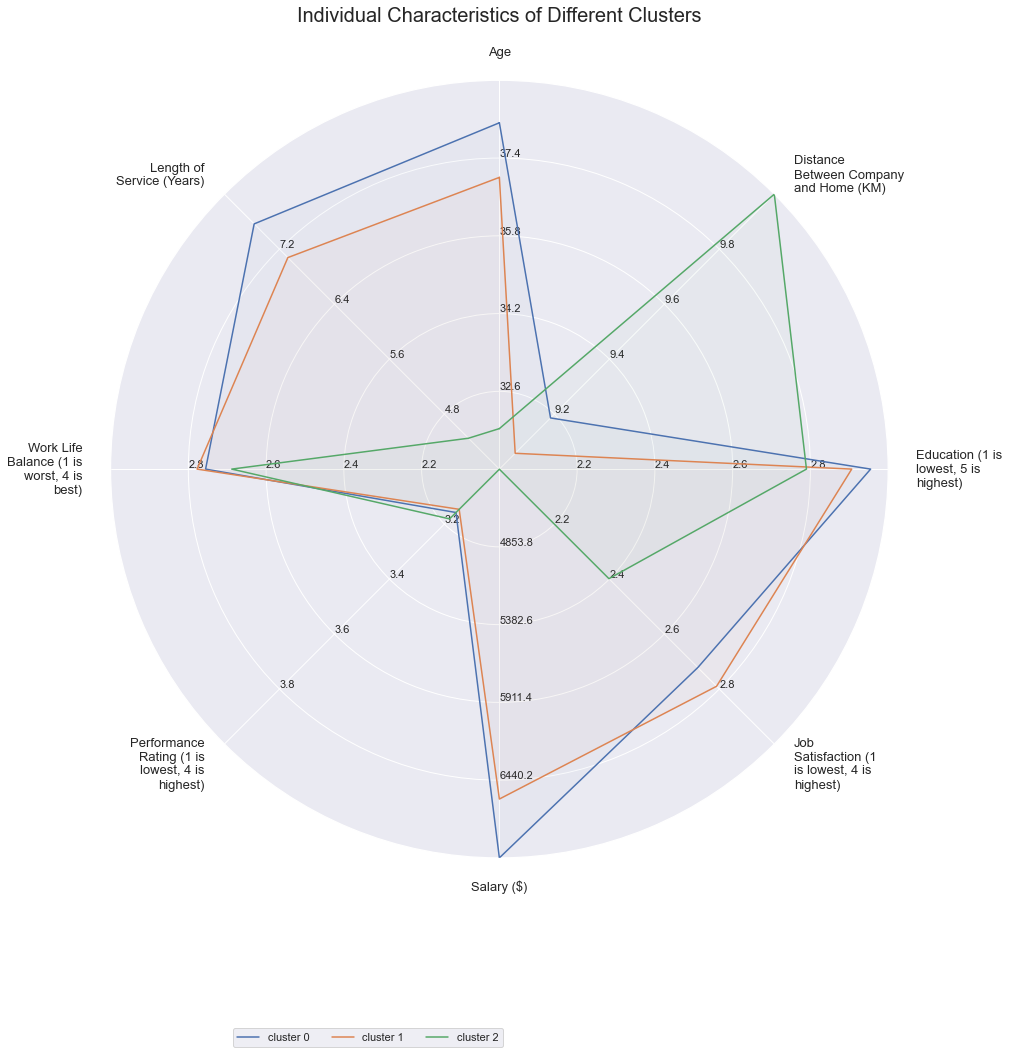

In [32]:
import math

# applying hyperparameter values
# initialising beta value and converting distance matrix to similarity matrix
beta = 5
similarity = np.exp(-beta * distance_matrix / distance_matrix.std())

# fit model
model = SpectralClustering(
        n_clusters = 3,
        assign_labels='discretize',
        eigen_solver = 'amg',
        affinity ='precomputed',
        random_state=0,
        n_jobs=-1
    ).fit(similarity)
labels = model.labels_
no_clusters = len(np.unique(labels) )
no_noise = np.sum(np.array(labels) == -1, axis=0)

# check for noise
print('Estimated no. of clusters: %d' % no_clusters)
print('Estimated no. of noise points: %d' % no_noise)

# fit results into df
pred = pd.DataFrame(model.fit_predict(similarity),columns=['Cluster'])
results = pd.concat([df_unscaled,pred],axis=1)
count = pd.DataFrame(model.fit(similarity).labels_).value_counts()
display(count)
cluster_centers = results.groupby('Cluster').mean()
display(cluster_centers)

# plot radar chart
min_max_per_variable = cluster_centers.describe().T[['min', 'max']]
min_max_per_variable['min'] = min_max_per_variable['min'].apply(lambda x: int(x))
min_max_per_variable['max'] = min_max_per_variable['max'].apply(lambda x: math.ceil(x))

variables = cluster_centers.columns
ranges = list(min_max_per_variable.itertuples(index=False, name=None))

fig1 = plt.figure(figsize=(12, 12))
radar = ComplexRadar(fig1, variables, ranges, show_scales=True)

for g in cluster_centers.index:
    radar.plot(cluster_centers.loc[g].values, label=f"cluster {g}")
    radar.fill(cluster_centers.loc[g].values, alpha=0.03)


radar.set_title("Individual Characteristics of Different Clusters")
radar.use_legend(loc='lower left', bbox_to_anchor=(0.15, -0.25),ncol=radar.plot_counter)


plt.show()

In [63]:
plot_quantitative

BusinessTravel  Education (1 is lowest, 5 is highest)  Gender  \
0         Travel_Rarely                                      2  Female   
1     Travel_Frequently                                      1    Male   
2         Travel_Rarely                                      2    Male   
3     Travel_Frequently                                      4  Female   
4         Travel_Rarely                                      1    Male   
...                 ...                                    ...     ...   
1465  Travel_Frequently                                      2    Male   
1466      Travel_Rarely                                      1    Male   
1467      Travel_Rarely                                      3    Male   
1468  Travel_Frequently                                      3    Male   
1469      Travel_Rarely                                      3    Male   

                Job Function  Job Satisfaction (1 is lowest, 4 is highest)  \
0                      Sales                                             4   
1     Research & Development                                             2   
2     Research & Development                                             3   
3     Research & Development                                             3   
4     Research & Development                                             2   
...                      ...                                           ...   
1465  Research & Development                                             4   
1466  Research & Development                                             1   
1467  Research & Development                                             2   
1468                   Sales                                             2   
1469  Research & Development                                             3   

     MaritalStatus  Performance Rating (1 is lowest, 4 is highest)  \
0           Single                                               3   
1          Married                                               4   
2           Single                                               3   
3          Married                                               3   
4          Married                                               3   
...            ...                                             ...   
1465       Married                                               3   
1466       Married                                               3   
1467       Married                                               4   
1468       Married                                               3   
1469       Married                                               3   

     Resign Status  Work Life Balance (1 is worst, 4 is best)  Cluster  
0              Yes                                          1        2  
1               No                                          3        1  
2              Yes                                          3        2  
3               No                                          3        0  
4               No                                          3        1  
...            ...                                        ...      ...  
1465            No                                          3        1  
1466            No                                          3        1  
1467            No                                          3        1  
1468            No                                          2        1  
1469            No                                          4        1  

[1470 rows x 10 columns]

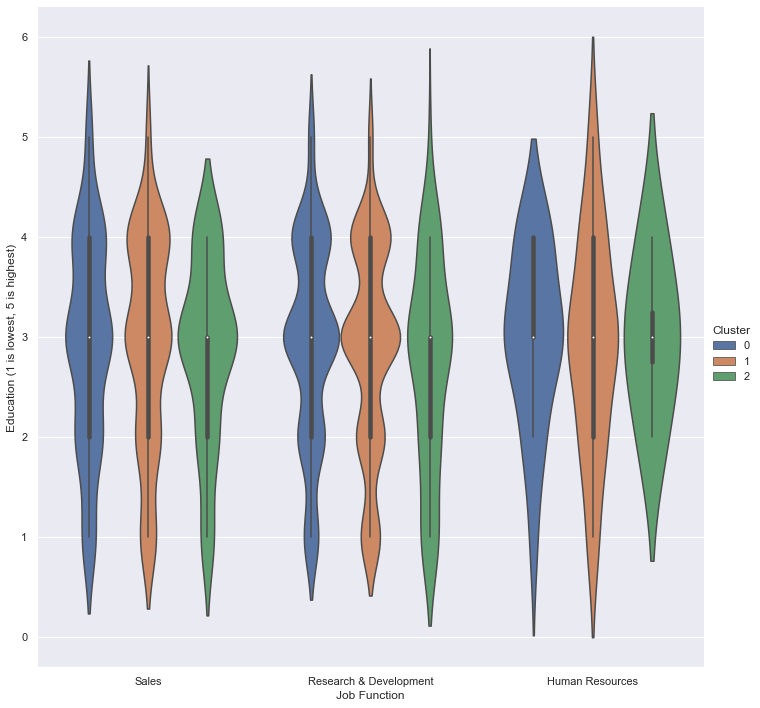

In [103]:
cols = list(qualitative.columns)
cols.append('Cluster')
plot_quantitative = results[cols]

sns.catplot(x="Job Function", y="Education (1 is lowest, 5 is highest)", hue="Cluster", kind="violin", data=plot_quantitative,height=10)
plt.show()


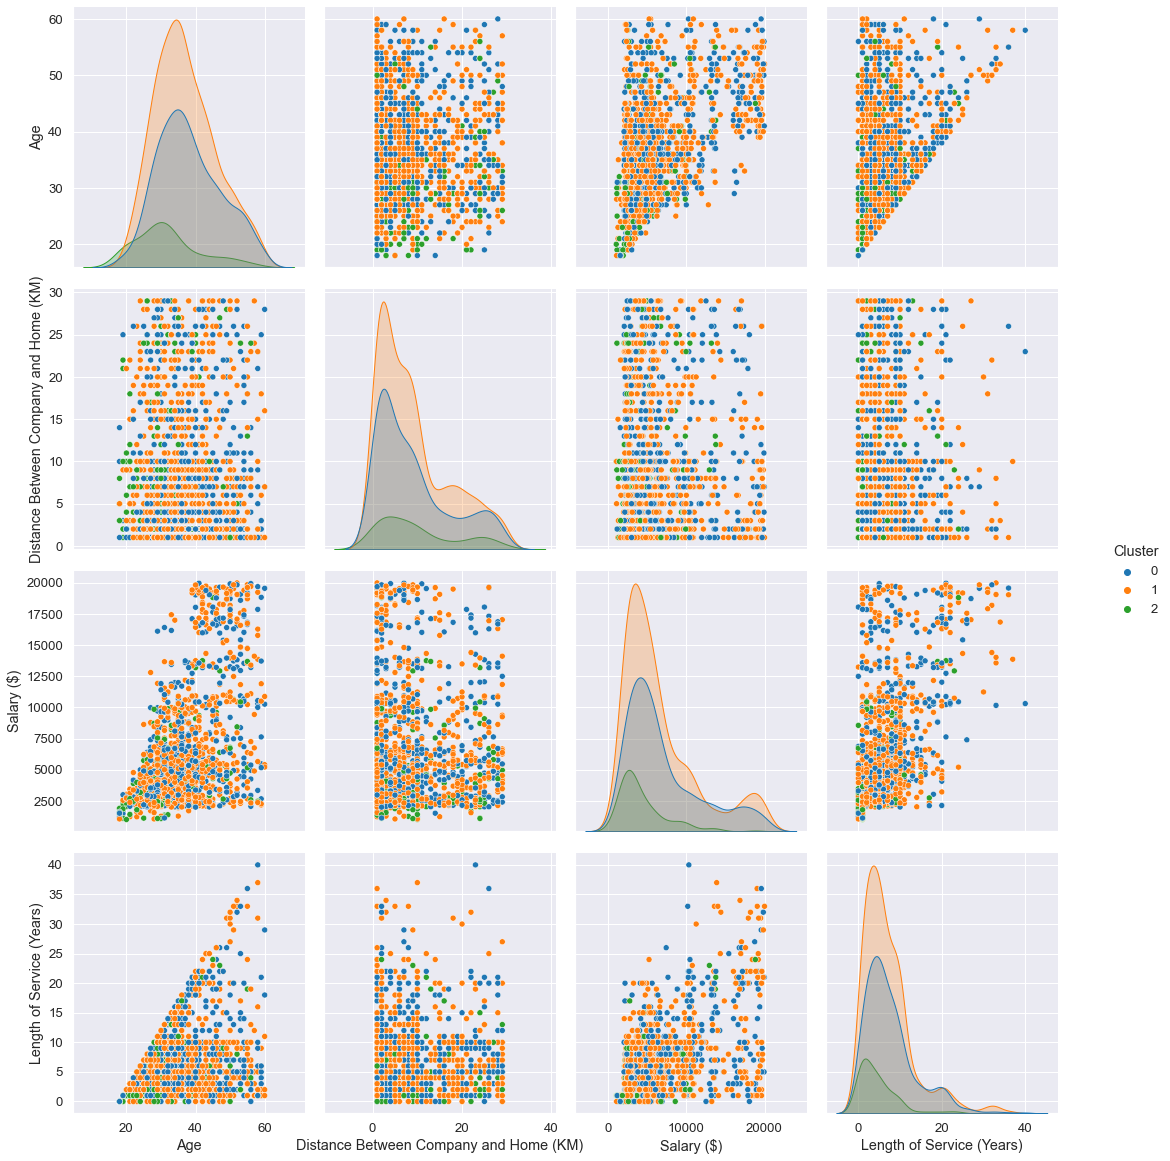

In [132]:
sns.set(font_scale=1.2)
plot_results = list(results[quantitative.columns])
plot_results.append('Cluster')
plot_results = results[plot_results]
g = sns.pairplot(plot_results,hue='Cluster',palette=sns.color_palette("tab10")[:3])
g.fig.set_size_inches(17,17)

##### Results Interpretation

We can see that the results of the hyper-parameter tuning are not effective. This is due to the fact that there are similarities for cluster 0 and cluster 1 for every single numerical column. This means that the algorithm was not effective at differentiating the 2 clusters from each other.

### Hyperparameter Tuning (Agglomerative)

In [146]:
from sklearn.model_selection import ParameterGrid

#defining hyper parameters
param_grid = {
    'n_clusters': [2,3,4,5],
    'linkage' : ['single', 'complete','average'],
}
params = list(ParameterGrid(param_grid))
results = {}

for param in params:
    # initialising model
    model = AgglomerativeClustering(
        n_clusters = param['n_clusters'],
        linkage=param['linkage'],
        affinity='precomputed'
    ).fit(distance_matrix)

    # retrieving model results
    pred = model.fit_predict(distance_matrix)
    count = pd.Series(model.fit(distance_matrix).labels_).value_counts()
    sil = silhouette_score(distance_matrix,labels=model.fit_predict(distance_matrix))
    if param['n_clusters']>2:
        results[sil] = {
            'n_clusters':param['n_clusters'],
            'linkage':param['linkage'],
            'count':[x for x in count]
        }

results = dict(sorted(results.items(), key=lambda item: item[0], reverse=True))
results

{0.22527367: {'n_clusters': 3, 'linkage': 'single', 'count': [1468, 1, 1]},
 0.20884162: {'n_clusters': 4, 'linkage': 'single', 'count': [1467, 1, 1, 1]},
 0.19506213: {'n_clusters': 3, 'linkage': 'average', 'count': [1463, 6, 1]},
 0.19385287: {'n_clusters': 5,
  'linkage': 'single',
  'count': [1466, 1, 1, 1, 1]},
 0.14738677: {'n_clusters': 4,
  'linkage': 'average',
  'count': [1248, 215, 6, 1]},
 0.1100408: {'n_clusters': 5,
  'linkage': 'average',
  'count': [1243, 215, 6, 5, 1]},
 0.090514906: {'n_clusters': 3,
  'linkage': 'complete',
  'count': [566, 530, 374]},
 0.08646557: {'n_clusters': 4,
  'linkage': 'complete',
  'count': [566, 530, 239, 135]},
 0.081810705: {'n_clusters': 5,
  'linkage': 'complete',
  'count': [566, 530, 193, 135, 46]}}

2    566
1    530
0    374
dtype: int64

Age  Distance Between Company and Home (KM)  \
Cluster                                                      
0        34.382353                               10.435829   
1        38.167925                                9.118868   
2        37.438163                                8.439929   

         Education (1 is lowest, 5 is highest)  \
Cluster                                          
0                                     2.868984   
1                                     2.894340   
2                                     2.959364   

         Job Satisfaction (1 is lowest, 4 is highest)   Salary ($)  \
Cluster                                                              
0                                            2.697861  5240.794118   
1                                            2.752830  7374.735849   
2                                            2.726148  6520.568905   

         Performance Rating (1 is lowest, 4 is highest)  \
Cluster                                                   
0                                              3.336898   
1                                              3.045283   
2                                              3.134276   

         Work Life Balance (1 is worst, 4 is best)  Length of Service (Years)  
Cluster                                                                        
0                                         2.689840                   5.860963  
1                                         2.800000                   7.881132  
2                                         2.772085                   6.948763

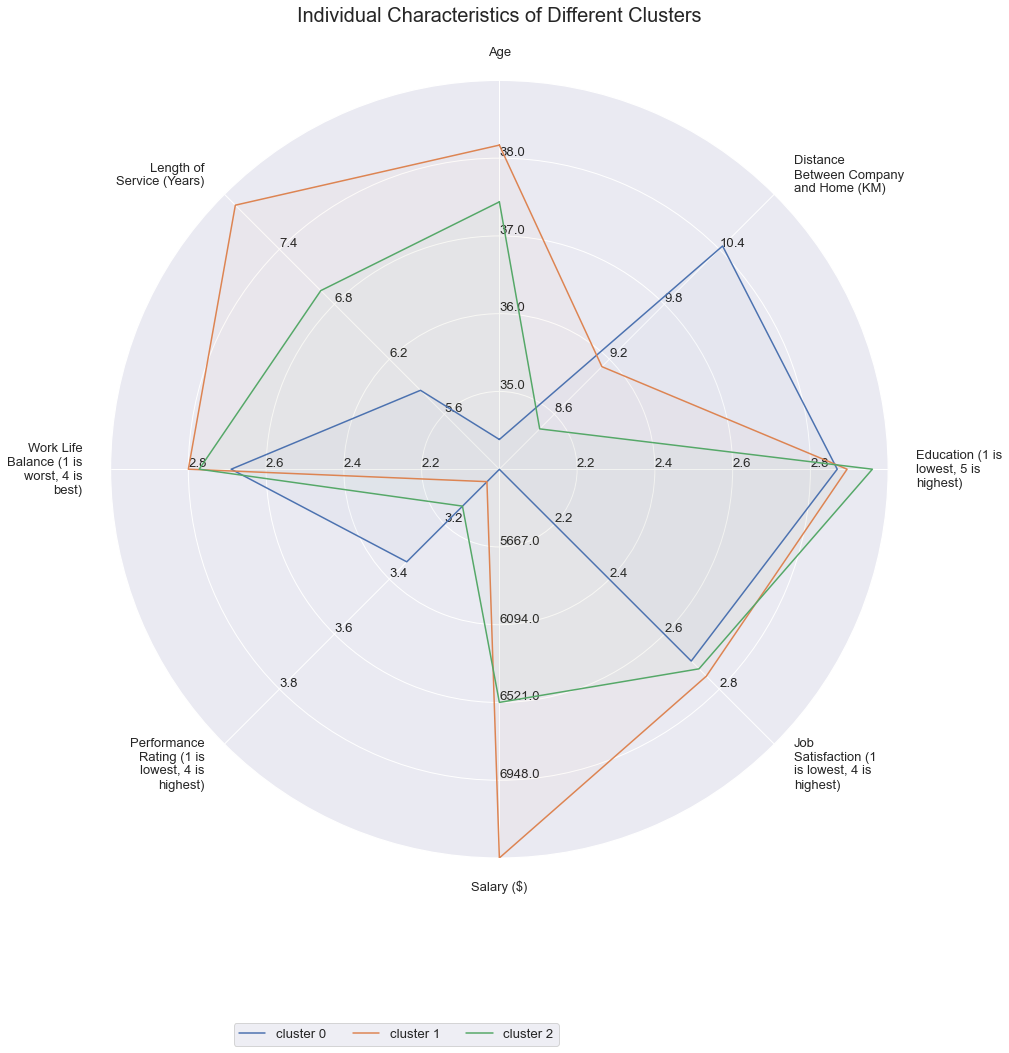

In [140]:
# initialise model
model = AgglomerativeClustering(n_clusters=3, affinity='precomputed', linkage='complete')
pred = pd.DataFrame(model.fit_predict(distance_matrix),columns=['Cluster'])
results = pd.concat([df_unscaled,pred],axis=1)
count = pd.DataFrame(model.fit(distance_matrix).labels_).value_counts()
display(count)
cluster_centers = results.groupby('Cluster').mean()
display(cluster_centers)



# plot radar chart
min_max_per_variable = cluster_centers.describe().T[['min', 'max']]
min_max_per_variable['min'] = min_max_per_variable['min'].apply(lambda x: int(x))
min_max_per_variable['max'] = min_max_per_variable['max'].apply(lambda x: math.ceil(x))

variables = cluster_centers.columns
ranges = list(min_max_per_variable.itertuples(index=False, name=None))

fig1 = plt.figure(figsize=(12, 12))
radar = ComplexRadar(fig1, variables, ranges, show_scales=True)

for g in cluster_centers.index:
    radar.plot(cluster_centers.loc[g].values, label=f"cluster {g}")
    radar.fill(cluster_centers.loc[g].values, alpha=0.03)


radar.set_title("Individual Characteristics of Different Clusters")
radar.use_legend(loc='lower left', bbox_to_anchor=(0.15, -0.25),ncol=radar.plot_counter)


plt.show()


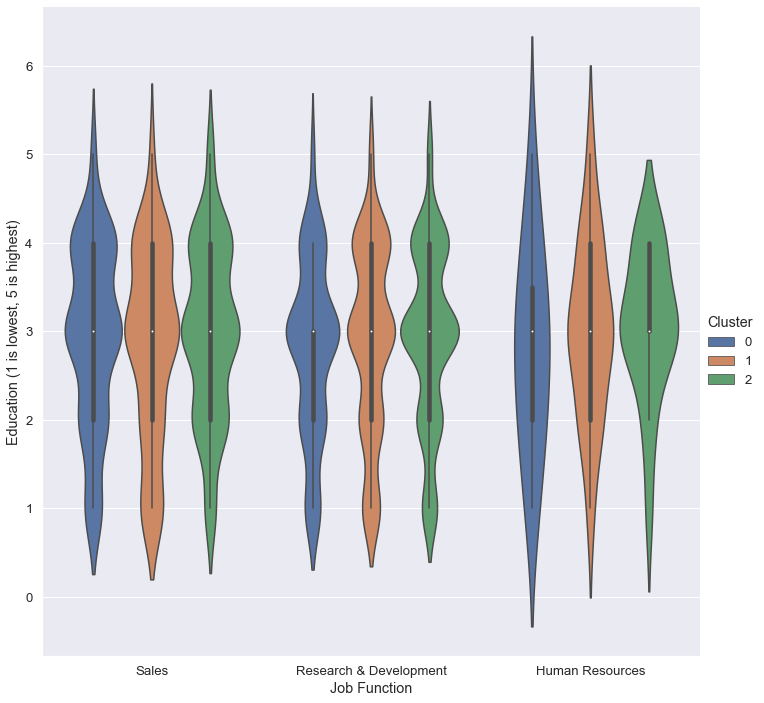

In [142]:
cols = list(qualitative.columns)
cols.append('Cluster')
plot_quantitative = results[cols]

sns.catplot(x="Job Function", y="Education (1 is lowest, 5 is highest)", hue="Cluster", kind="violin", data=plot_quantitative,height=10)
plt.show()

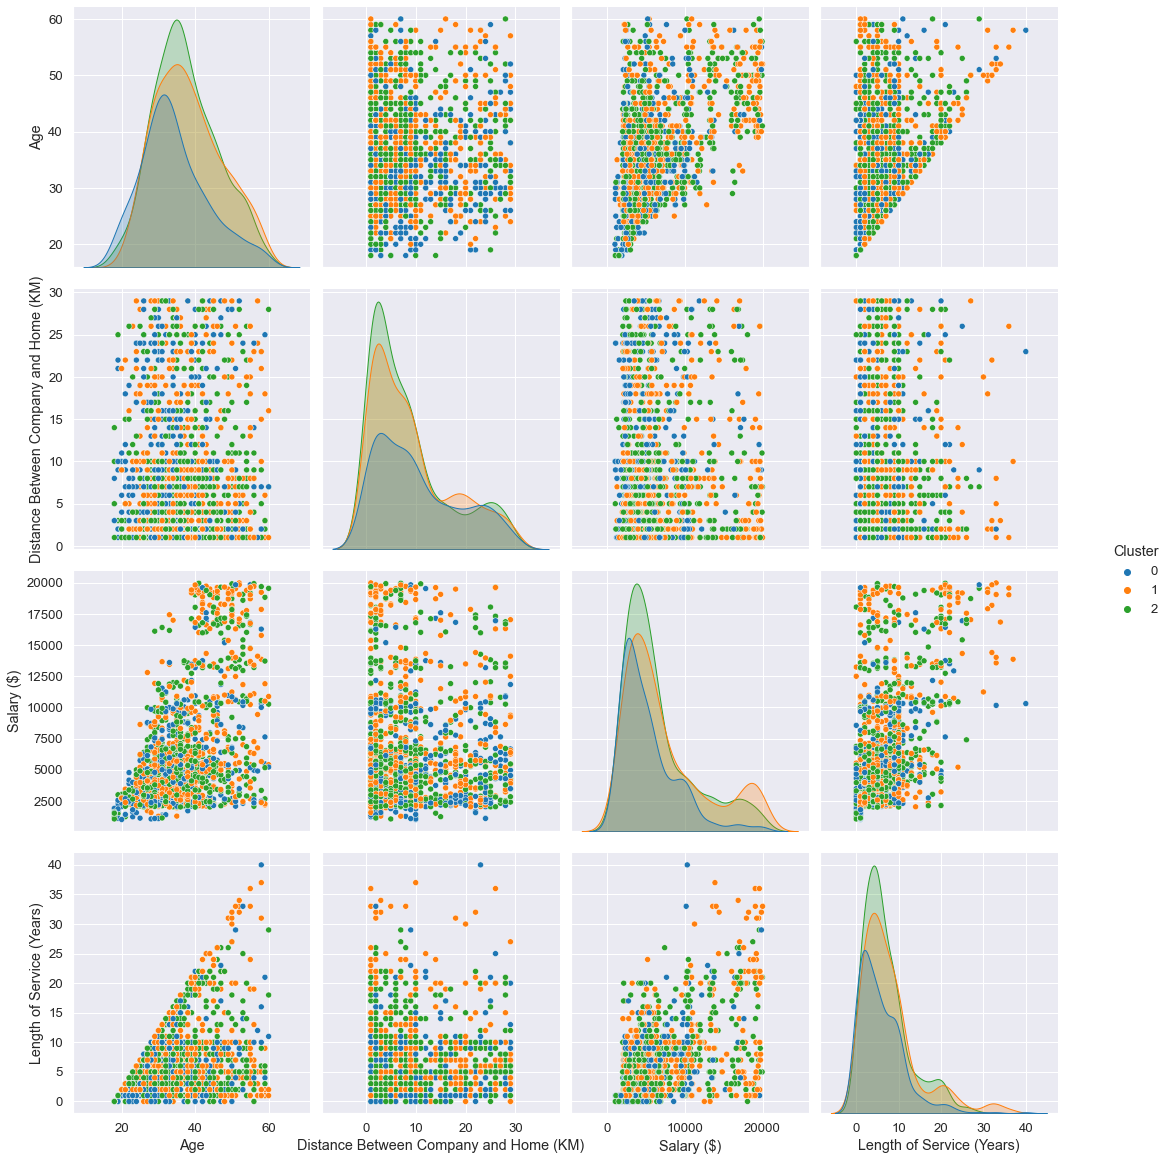

In [143]:
sns.set(font_scale=1.2)
plot_results = list(results[quantitative.columns])
plot_results.append('Cluster')
plot_results = results[plot_results]
g = sns.pairplot(plot_results,hue='Cluster',palette=sns.color_palette("tab10")[:3])
g.fig.set_size_inches(17,17)

##### Result Analysis
We use the `complete` method to ensure that all clusters are generally of the same size. This also presented us with 3 distinct clusters.

We can see that the older the staff, the greater the salary. This may be due to the fact that older staff are more experienced, and that this industry experience accounts for their competency, which then accounts for the salary.

However, we can observe that the inverse is true for Performance Rating. The younger staff are actually rated higher than the older staff. This suggests that the increase in pay is due to company loyalty, as the pay raise is not credited to an increase in performance or competency of the staff.

Additionally, we can see that educational qualifications do not matter when it comes to the hireabiity of the staff in the company, nor does it affect salary. All 3 clusters share around a 2.9-3.1 in the scale of educational qualifications. This also further justifies the previous point on industry experience.

This suggests that this company focuses more on the job training as opposed to educational qualifications, leading me to believe that the company is a trade-focused company as opposed to a academia-based company. Examples of these 2 are Oil-Rig workers compared to Teachers.

We can also see that the work-life balance for the older staff is greater, as they take on more senior roles in the company with time. These promotions to senior positions mean that they have greater out-of-office responsibilities, and do not have to deal with the manual labour that comes with the job, thus accounting for better work-life balance.

An interesting fact is that the distance between company for home is drastically different for the newer employees. This may be due to the fact that young people that were hired haven't decided to settle down yet, as they will most probably purchase a house nearer to their workplace when they begin to commit to the job and its responsibilities. This means that the housing that they are staying in will be  further away since they are not ready to make that commitment.

As expected, the age of the employees also directly correlate to the length of service at the company. This suggests that in the cultural society that this company is based in, there tends to be greater employee retention, suggesting that the employee will have a tendency to work at one company for a longer duration of time compared to normal. This means that if the employee chooses to resign, then there needs to be an internal investigation carried out to analyse the cause and effect. This also further backs up the claim of the previous paragraph, as the older employees get, the more they will want to settle down in their life, and with the same company too.

In conclusion, there are more benefits for employees the longer they stay at the company. To enter the company, one must have industry experience as educational qualifications are not prioritised.

If the company wishes to keep their employees, they should offer accommodation for their newer employees, as length of service is a chicken and egg problem. Employees cannot get promoted if they do not stay long enough, but they will not stay long enough if they do not get promoted. To mitigate this risk, the company should not only offer accommodation, but also offer to upgrade the employee's skills to reduce the risk of their employees getting poached.

## Credits

- Verma, Y. (2021). Why Data Scaling is important in Machine Learning & How to effectively do it. [online] Analytics India Magazine. Available at:
https://analyticsindiamag.com/why-data-scaling-is-important-in-machine-learning-how-to-effectively-do-it/#:~:text=Scaling%20the%20target%20value%20is
[Accessed 15 Jun. 2022]

- Headstart (2020). Gender bias in the workplace - why does it still happen? [online] Headstart. Available at: https://www.headstart.io/insights/gender-bias-in-the-workplace-why-does-it-still-happen/
[Accessed 3 Aug. 2022]

- Anand, D. (2020). Gower’s Distance. [online] Analytics Vidhya. Available at: https://medium.com/analytics-vidhya/gowers-distance-899f9c4bd553
[Accessed 6 Aug. 2022].
- Kumar, S. (2020b). Agglomerative Clustering and Dendrograms — Explained. [online] Medium. Available at: https://towardsdatascience.com/agglomerative-clustering-and-dendrograms-explained-29fc12b85f23
[Accessed 6 Aug. 2022].
- Kumar, A. (2020a). KMeans Silhouette Score With Python Examples - DZone AI. [online] dzone.com. Available at: https://dzone.com/articles/kmeans-silhouette-score-explained-with-python-exam#:~:text=Silhouette%20score%20is%20used%20to
[Accessed 7 Aug. 2022].
- E.M., Mirkes. (2011). K-means and K-medoids. [online] www.math.le.ac.uk. Available at: http://www.math.le.ac.uk/people/ag153/homepage/KmeansKmedoids/Kmeans_Kmedoids.html
[Accessed 7 Aug. 2022].
- Fleshman, W. (2019). Spectral Clustering. [online] Medium. Available at: https://towardsdatascience.com/spectral-clustering-aba2640c0d5b
[Accessed 7 Aug. 2022].
- Doshi, N. (2019). Spectral Clustering. [online] Medium. Available at: https://towardsdatascience.com/spectral-clustering-82d3cff3d3b7
[Accessed 7 Aug. 2022].
